# Imports

In [1]:
import pandas as pd
import numpy as np

import lib.draw as draw
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor, NearestNeighbors
from sklearn.neural_network import MLPClassifier
import pickle

# Loading data

In [2]:
df = pd.read_csv('data/formated_data.csv').drop('Unnamed: 0', axis = 1)
df

type  player  team  success      x      y   endX   endY  isShot  \
0       Pass  322852  2187        1  0.501  0.519  0.373  0.572   False   
1       Pass   83556  2187        1  0.372  0.573  0.319  0.790   False   
2       Pass  137387  2187        1  0.333  0.766  0.243  0.597   False   
3       Pass  322847  2187        1  0.253  0.678  0.280  0.321   False   
4       Pass  322849  2187        0  0.365  0.114  0.886  0.000   False   
...      ...     ...   ...      ...    ...    ...    ...    ...     ...   
243770  Pass   90310   297        1  0.686  0.210  0.663  0.374   False   
243771  Pass   94891   297        1  0.652  0.458  0.680  0.875   False   
243772  Pass  125793   297        0  0.692  0.947  0.961  0.555   False   
243773  Pass   32381   108        0  0.150  0.484  0.727  0.603   False   
243774  Pass  291653   108        1  0.622  0.400  0.680  0.581   False   

        isGoal  ...  prevForwardAct  prevCross  prevPass  prevDribble  \
0        False  ...           False      False     False        False   
1        False  ...           False      False      True        False   
2        False  ...           False      False      True        False   
3        False  ...           False      False      True        False   
4        False  ...            True      False      True        False   
...        ...  ...             ...        ...       ...          ...   
243770   False  ...            True      False      True        False   
243771   False  ...           False      False      True        False   
243772   False  ...            True      False      True        False   
243773   False  ...            True       True      True        False   
243774   False  ...            True      False      True        False   

               r         a  rebound_r  rebound_a  dribble_r  dribble_a  
0       0.138539  0.937521   0.000000   0.500000        0.0        0.5  
1       0.223379  0.788126   0.000000   0.500000        0.0        0.5  
2       0.191471  0.172119   0.000000   0.500000        0.0        0.5  
3       0.358020  0.262014   0.000000   0.500000        0.0        0.5  
4       0.533326  0.465716   0.000000   0.500000        0.0        0.5  
...          ...       ...        ...        ...        ...        ...  
243770  0.165605  0.772176   0.000000   0.500000        0.0        0.5  
243771  0.417939  0.739329   0.000000   0.500000        0.0        0.5  
243772  0.475421  0.345719   0.611485   0.144929        0.0        0.5  
243773  0.589143  0.532370   0.479416   0.471969        0.0        0.5  
243774  0.190066  0.700645   0.000000   0.500000        0.0        0.5  

[243775 rows x 37 columns]

# Filtering data

In [3]:
# Remove non-shot events
df = df[df.isShot]
df

type  player  team  success      x      y   endX   endY  \
43        SavedShot  322852  2187        1  0.725  0.460  0.725  0.460   
66        SavedShot  322852  2187        1  0.910  0.503  0.910  0.503   
91      MissedShots  322854  2187        1  0.842  0.365  0.842  0.365   
95             Goal  322852  2187        1  0.885  0.548  0.885  0.548   
224       SavedShot  302324  2188        1  0.758  0.555  0.758  0.555   
...             ...     ...   ...      ...    ...    ...    ...    ...   
243566  MissedShots  331115   297        1  0.892  0.499  0.892  0.499   
243652         Goal   70617   108        1  0.902  0.633  0.902  0.633   
243666    SavedShot   90310   297        1  0.848  0.473  0.848  0.473   
243680  MissedShots   78027   297        1  0.888  0.488  0.888  0.488   
243731    SavedShot   70617   108        1  0.639  0.631  0.639  0.631   

        isShot  isGoal  ...  prevForwardAct  prevCross  prevPass  prevDribble  \
43        True   False  ...            True      False      True        False   
66        True   False  ...            True       True      True        False   
91        True   False  ...           False      False      True        False   
95        True    True  ...            True       True      True        False   
224       True   False  ...            True      False      True        False   
...        ...     ...  ...             ...        ...       ...          ...   
243566    True   False  ...           False      False      True        False   
243652    True    True  ...           False      False      True        False   
243666    True   False  ...           False       True      True        False   
243680    True   False  ...            True      False      True        False   
243731    True   False  ...            True      False      True        False   

          r    a  rebound_r  rebound_a  dribble_r  dribble_a  
43      0.0  0.5        0.0        0.5        0.0        0.5  
66      0.0  0.5        0.0        0.5        0.0        0.5  
91      0.0  0.5        0.0        0.5        0.0        0.5  
95      0.0  0.5        0.0        0.5        0.0        0.5  
224     0.0  0.5        0.0        0.5        0.0        0.5  
...     ...  ...        ...        ...        ...        ...  
243566  0.0  0.5        0.0        0.5        0.0        0.5  
243652  0.0  0.5        0.0        0.5        0.0        0.5  
243666  0.0  0.5        0.0        0.5        0.0        0.5  
243680  0.0  0.5        0.0        0.5        0.0        0.5  
243731  0.0  0.5        0.0        0.5        0.0        0.5  

[5041 rows x 37 columns]

# Gradient functions

In [4]:
# Function to visualize the gradient
def plot_xgmap(xgmap):
    draw.pitch()
    xgmap.x *= 100
    xgmap.y *= 100
    cmap = np.zeros((len(xgmap),4))
    cmap[:,0] = 0; cmap[:,1] = 0; cmap[:,2] = 0; cmap[:,3] = xgmap.xg
    plt.scatter(xgmap.x, xgmap.y, s = 15, c = cmap, marker = 's', linewidth=0, zorder = 10);

In [5]:
# DEPRECATED
# Create the xgmap using KNN
def calculate_xgmap_via_knn(shot_data, k=30):
    data = shot_data[['x', 'y', 'isGoal']]

    nn = NearestNeighbors(n_neighbors=k, n_jobs = -1)
    nn.fit(data[['x','y']], data['isGoal'])

    xgmap = [[i,j] for i in range(50,100) for j in np.arange(0, 100, 1.5)]
    xgmap = pd.DataFrame(xgmap, columns=['x','y'])

    estimated_xg = []
    for i, pixel in xgmap.iterrows():
        neighbors_dist, neighbors_ind = nn.kneighbors(pixel[['x','y']].to_numpy().reshape(1, -1))
        counter = 0
        sumer = 0
        for n_dist, n_ind in zip(neighbors_dist[0], neighbors_ind[0]):
            if n_dist > 10:
                continue
            counter += 1
            sumer += data.iloc[n_ind]['isGoal']
        # Avoid div by 0
        if counter == 0:
            counter += 1

        estimated_xg.append(sumer / counter)

    xgmap['xg'] = estimated_xg

    return xgmap

In [6]:
# Create the xgmap using Neural Networks
def calculate_xgmap_via_nn(shot_data):
    data = shot_data[['prevForwardAct', 'prevPass', 'prevDribble', 'x', 'y', 'isGoal']]

    nn = MLPClassifier(hidden_layer_sizes=(200,200), activation = 'relu', learning_rate_init=0.001, max_iter=5000)
    nn.fit(data[['prevForwardAct', 'prevPass', 'prevDribble', 'x', 'y']], data['isGoal'])

    data_list = []
    for prevForwardAct in [0, 1]:
        for prevPass in [0, 1]:
            for prevDribble in [0, 1]:
                if prevPass + prevDribble <= 1:
                    data_list += [[prevForwardAct, prevPass, prevDribble, i/100,j/100] for i in range(0,100) for j in np.arange(0, 100, 1.5)]
                

    xgmap = pd.DataFrame(data_list, columns=['prevForwardAct', 'prevPass', 'prevDribble', 'x', 'y'])
    xgmap['xg'] = nn.predict_proba(xgmap[['prevForwardAct', 'prevPass', 'prevDribble', 'x', 'y']])[:,1]

    return xgmap, nn

# Full Map

In [7]:
xgmap, nn = calculate_xgmap_via_nn(df)

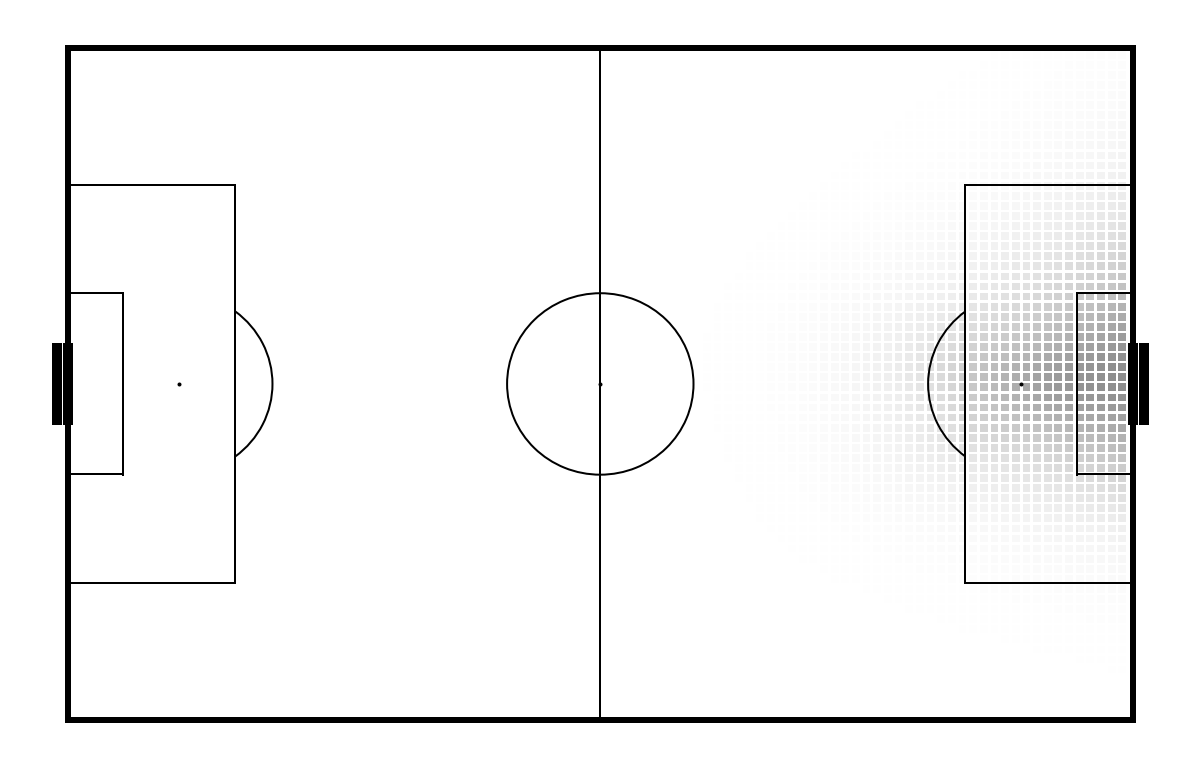

In [8]:
plot_xgmap(xgmap[(xgmap.prevForwardAct == 1) & (xgmap.prevPass == 1)])

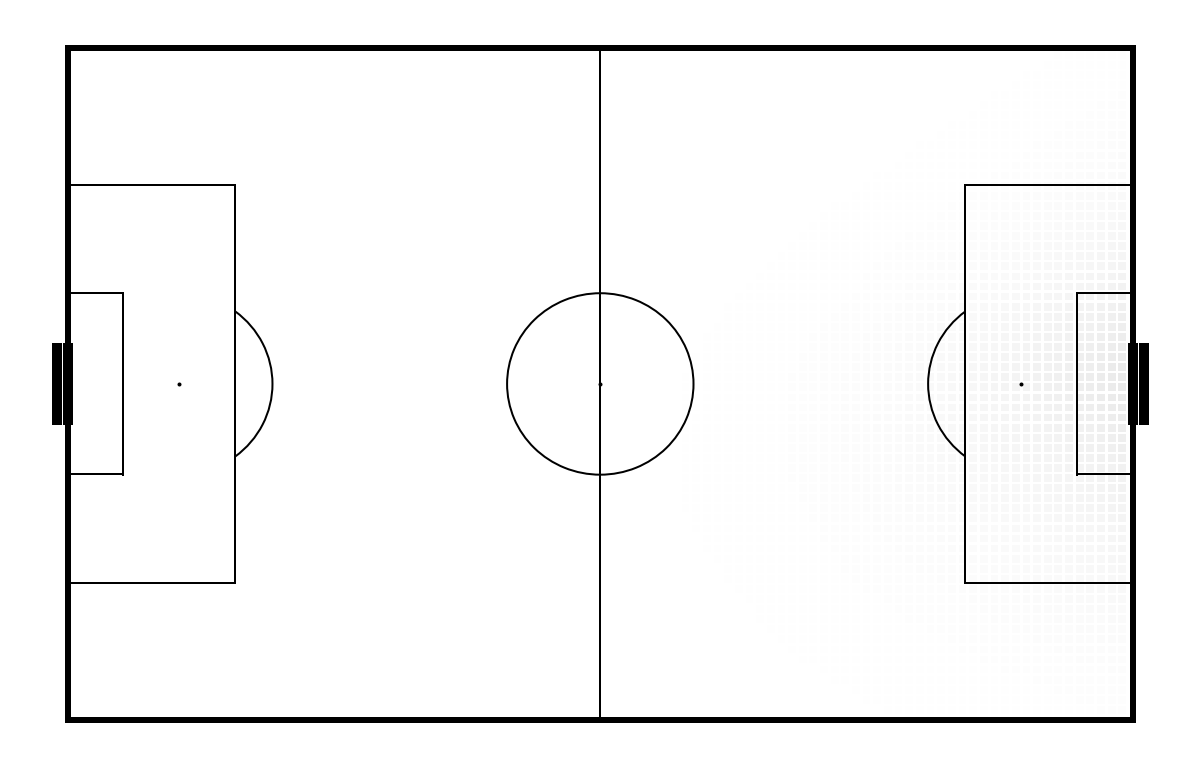

In [9]:
plot_xgmap(xgmap[(xgmap.prevForwardAct == 1) & (xgmap.prevDribble == 1)])

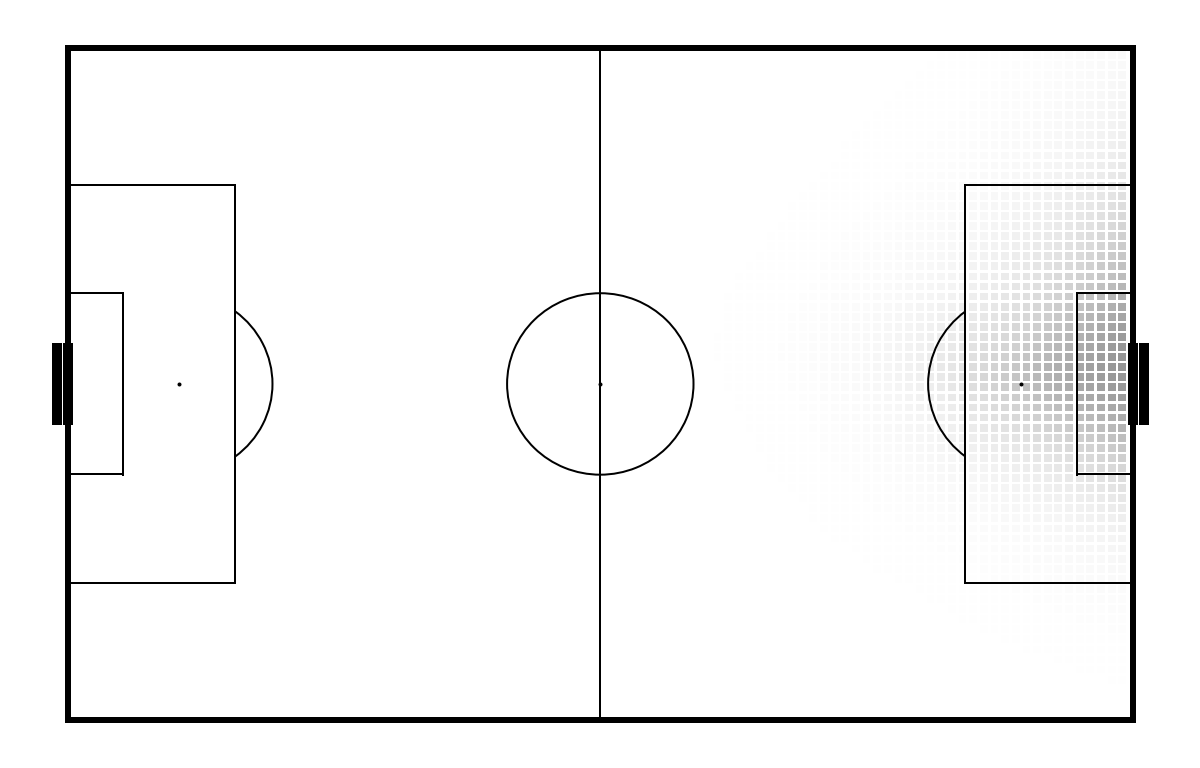

In [10]:
plot_xgmap(xgmap[(xgmap.prevForwardAct == 0) & (xgmap.prevPass == 1)])
plt.savefig('mams report/xgmap.png', dpi=500)

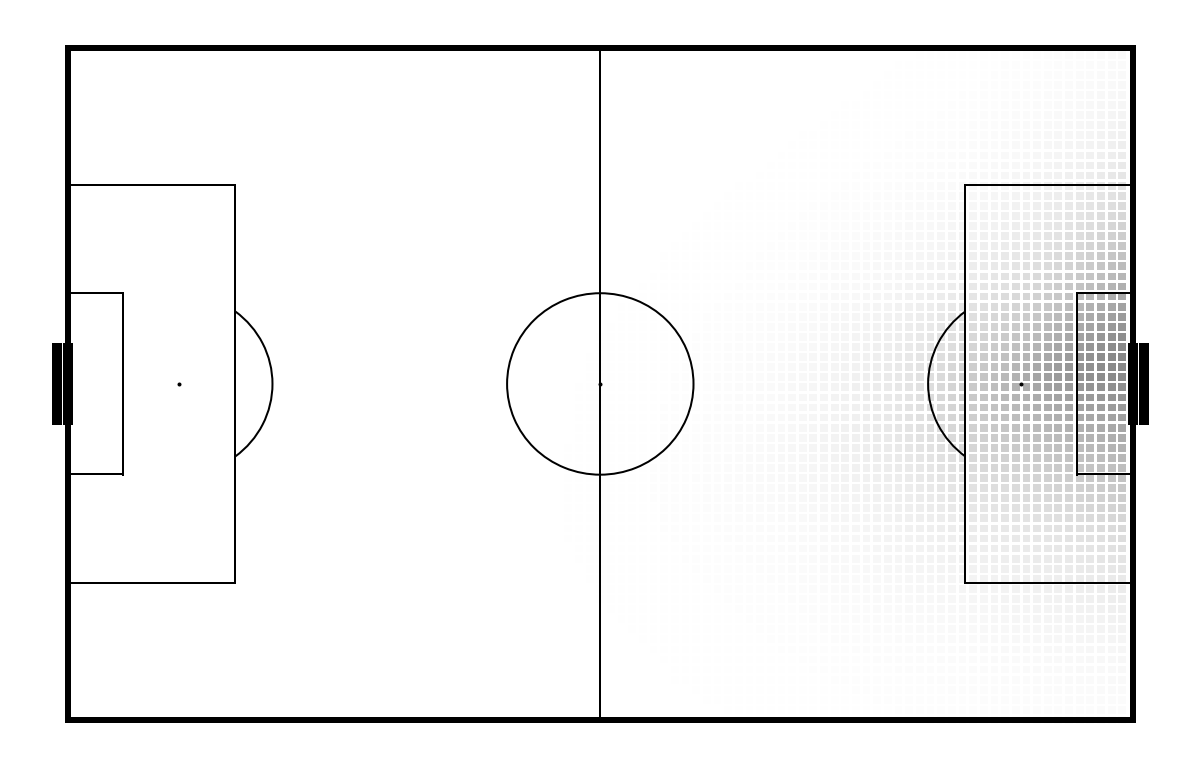

In [11]:
plot_xgmap(xgmap[(xgmap.prevForwardAct == 0) & (xgmap.prevDribble == 1)])

# Save model for use in simulator

In [12]:
pickle.dump(nn, open('matrix/shot_gradient2.sav', 'wb'))